In [14]:
from math import *
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(10)
NSE=pd.read_csv('C:/Users/sadhv/OneDrive/Desktop/Dissertation/^NSEI.csv',index_col='Date')
NSE.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0


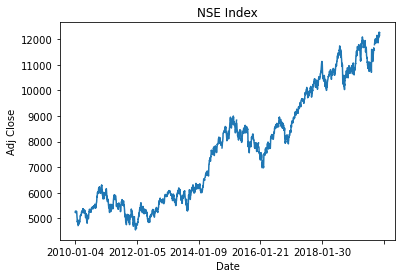

count     2444.000000
mean      7751.132839
std       2207.523215
min       4544.200195
25%       5677.437378
50%       7784.024902
75%       9654.512451
max      12271.799805
Name: Adj Close, dtype: float64

In [15]:
#Univariate setup:At first stage we only  consider the closing prices of NSE index and try to fit a Time series Model
#Considering the closing price 
NSE['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.title("NSE Index")
plt.show()
NSE['Adj Close'].describe()

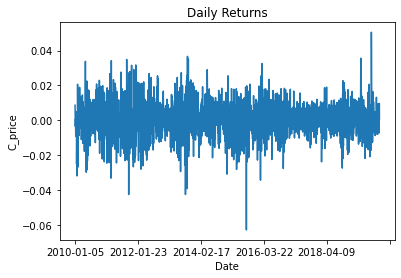

In [16]:
#DataPreparation
C_price=NSE.iloc[:,4]
C_price
NSE['C_price']=C_price.diff()/C_price#Daily returns
NSE=NSE.dropna()
NSE['C_price'].plot()
plt.xlabel("Date")
plt.ylabel("C_price")
plt.title("Daily Returns")
plt.show()

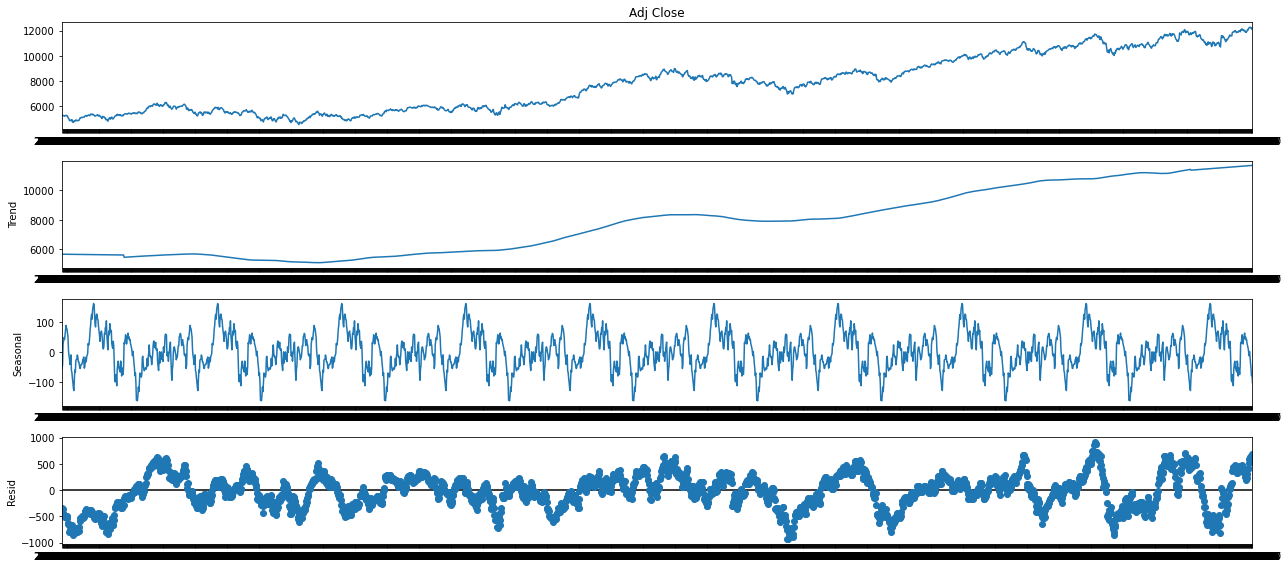

In [17]:
import statsmodels.api as sm#Statsmodels is a Python module which provides various functions for estimating different statistical models and performing statistical tests
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(NSE['Adj Close'],period=252,extrapolate_trend="freq")
fig=decomposition.plot()

In [18]:
NSE=NSE.drop(['Open','High','Low','Close','Volume'],axis='columns')
NSE.head()
NSE.reset_index()

,Date,Adj Close,C_price
0,2010-01-05,5277.899902,0.008659
1,2010-01-06,5281.799805,0.000738
2,2010-01-07,5263.100098,-0.003553
3,2010-01-08,5244.750000,-0.003499
4,2010-01-11,5249.399902,0.000886
...,...,...,...
2414,2019-12-23,12262.750000,-0.000738
2415,2019-12-24,12214.549805,-0.003946
2416,2019-12-26,12126.549805,-0.007257
2417,2019-12-27,12245.799805,0.009738


In [19]:
from scipy.stats import norm
import numpy as np
import math
def ro(y):
    n=len(y)
    q=0
    for i in range(0,n-1):
        for j in  range(i+1,n):
            if y[i]>y[j]:
                q=q+1
    eq=n*(n-1)
    tau=1-(4*q/eq)
    Variance=2*(2*n+5)/(9*eq)
    z=tau/(math.sqrt(Variance))
    if z>0:
        p_value=1-norm.cdf(z)
    else:
        p_value=norm.cdf(z)
    print("Relative Ordering Test for Presence of trend \n\n")
    print("NULL Hypothesis:Absence of trend and, \n\n")
    print("Test Statistic ",round(z,4),"\n\n")
    print("p value:",round(p_value,4) ," \n\n")
    print("No.of Discordants",q,"\n\n")
    print("Expected Number of discordants",eq/4, "\n\n")
y=[]
y=NSE['Adj Close']
ro(y)
print("p value less than 0.05 so we reject null hypothesis\n Since Q<<E[Q] it implies a rising trend")

Relative Ordering Test for Presence of trend 


NULL Hypothesis:Absence of trend and, 


Test Statistic  59.1616 


p value: 0.0  


No.of Discordants 288802 


Expected Number of discordants 1462285.5 


p value less than 0.05 so we reject null hypothesis
 Since Q<<E[Q] it implies a rising trend


Detrending the data

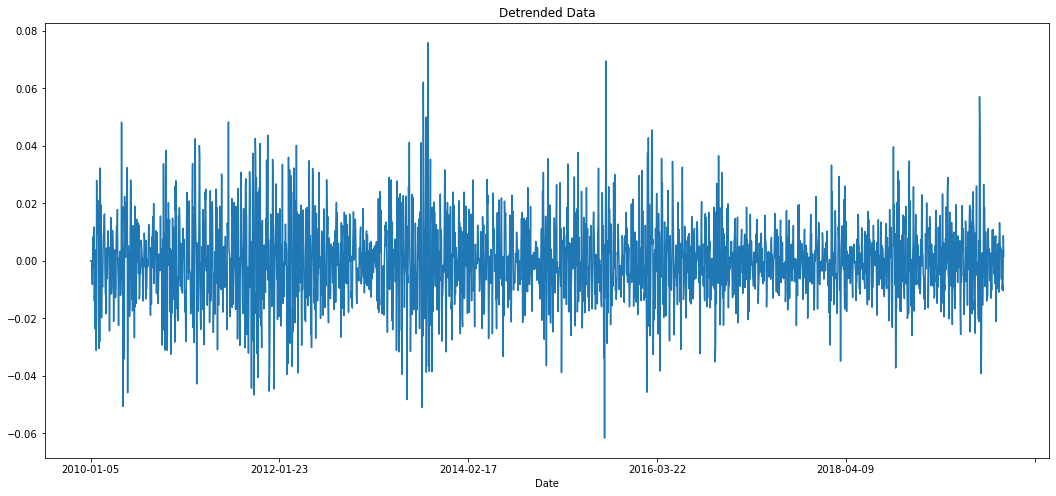

Relative Ordering Test for Presence of trend 


NULL Hypothesis:Absence of trend and, 


Test Statistic  -0.2112 


p value: 0.4164  


No.of Discordants 1466475 


Expected Number of discordants 1462285.5 


p value is greater than 0.05 so we accept the null hypothesis : No trend 


In [20]:
detrend=(NSE['C_price'].diff(4).fillna(0))
detrend.plot()
plt.title("Detrended Data")
plt.show()
ro(detrend)
print("p value is greater than 0.05 so we accept the null hypothesis : No trend ")

Since difference of daily returns give us the best  data with no trend we proceed with it.

Turning Point Test for Randomness of time series

In [21]:
from scipy.stats import norm
import numpy as np
import math
def tpt(y):
    p=0
    n=len(y)
    for i in range(1,n-1):
        if ((y[i]>y[i-1] and y[i]>y[i+1]) or (y[i]<y[i-1])and (y[i]<y[i+1])) :
            p=p+1
        else:
            pass
    ep=2/3*(n-2)
    vp=(16*n-29)/90
    z=(p-ep)/(math.sqrt(vp))
    if z>0:
        p_value=1-norm.cdf(z)
    else:
        p_value=norm.cdf(z)
    print("Turning Point test for Presence of Randomness \n\n")
    print("NULL Hypothesis:Series is purely random and, \n\n")
    print("Test Statistic ",round(z,4),"\n\n")
    print("p value:",round(p_value,4) ," \n\n")
    print("Number of turning points",p,"\n\n")
tpt(detrend)

Turning Point test for Presence of Randomness 


NULL Hypothesis:Series is purely random and, 


Test Statistic  -0.2573 


p value: 0.3985  


Number of turning points 1606 




Since p value is  greater than 0.05 we accept the null hypothesis.

In [22]:
#This is a test for stationary 
from statsmodels.tsa.stattools import adfuller
#perform dickey fuller test 
def perform_adftest(y):
    result=adfuller(y)
    print('ADF Statistic :%f'% result[0])
    print('p value :%f'% result[1])
perform_adftest(detrend)

ADF Statistic :-15.939155
p value :0.000000


P value is less than 0.05 so we reject the null hypothesis

<ipython-input-23-0e41d3a7a435>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sm.tsa.seasonal_decompose(detrend, model='additive', freq=252)


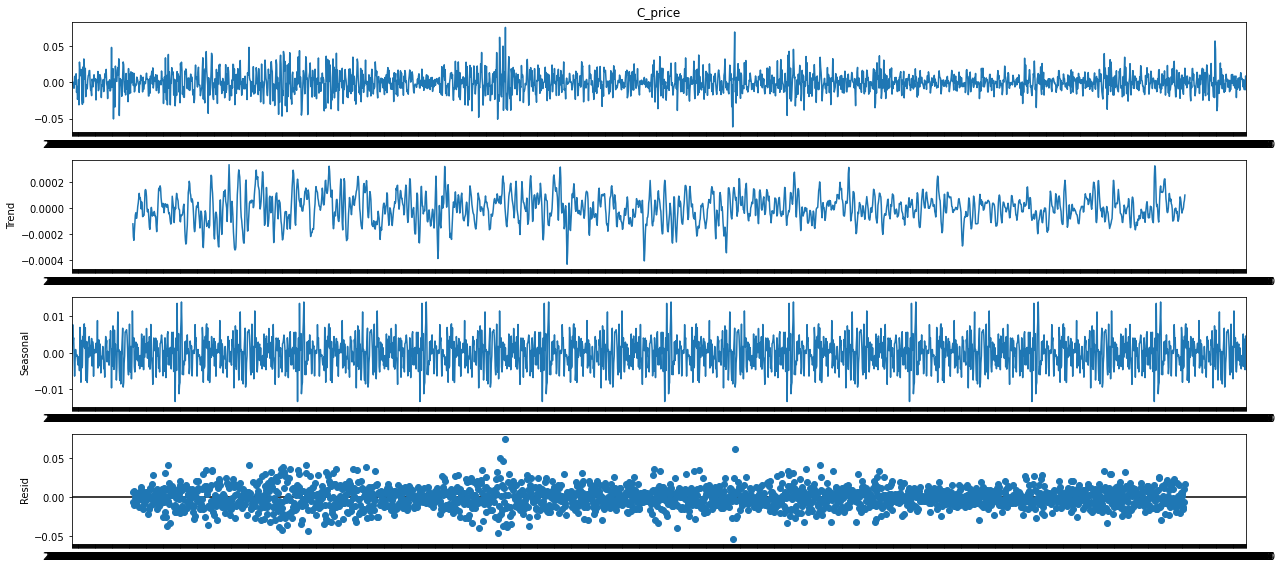

In [23]:
#After the differencing of the data 
rcParams['figure.figsize'] = 18,8 
decomposition = sm.tsa.seasonal_decompose(detrend, model='additive', freq=252) 
fig = decomposition.plot() 
plt.show() 

ACF and PACF Model

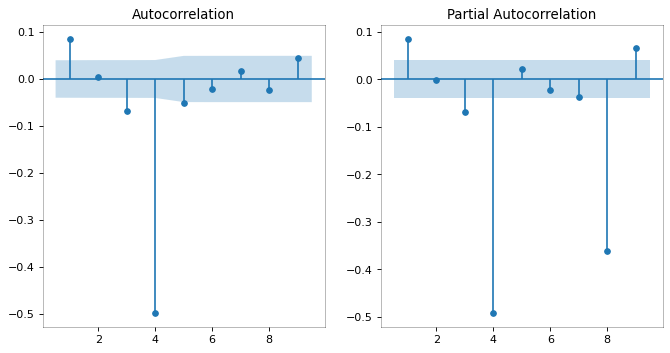

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Draw Plot
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5), dpi= 80)
plot_acf(detrend, ax=ax1, lags=np.arange(1,10))
plot_pacf(detrend, ax=ax2, lags=np.arange(1,10), method='ols')
# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)
# font size of tick labels
ax1.tick_params(axis='both', labelsize=10)
ax2.tick_params(axis='both', labelsize=10)
plt.show()


In [25]:
from statsmodels.tsa.arima.model import ARIMA
AIC=[]
BIC=[]
for p in range(0,4):
    for q in range(0,4):
        model=ARIMA(detrend,order=(p,0,q))
        model_fit=model.fit()
        AIC.append(model_fit.aic)
        BIC.append(model_fit.bic)

C:\Users\sadhv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sadhv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sadhv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sadhv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no ass

In [26]:
np.reshape(AIC,(4,4))

array([[-13819.59428792, -13835.06585854, -13831.78882356,
        -14032.97972359],
       [-13835.19856245, -13833.20138921, -13873.9234912 ,
        -13945.13634158],
       [-13833.20935225, -13831.19553248, -13829.33890944,
        -14461.76516798],
       [-13842.69992189, -14257.63853955, -14208.20065406,
        -14279.46459334]])

In [27]:
np.reshape(BIC,(4,4))

array([[-13808.0120689 , -13817.69253001, -13808.62438552,
        -14004.02417604],
       [-13817.82523392, -13810.03695117, -13844.96794365,
        -13910.38968452],
       [-13810.04491421, -13802.23998492, -13794.59225238,
        -14421.22740141],
       [-13813.74437434, -14222.89188249, -14167.66288749,
        -14233.13571726]])

In [28]:
final=ARIMA(NSE['Adj Close'],order=(2,4,3))
final=final.fit()

C:\Users\sadhv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sadhv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sadhv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [29]:
pred=final.predict()

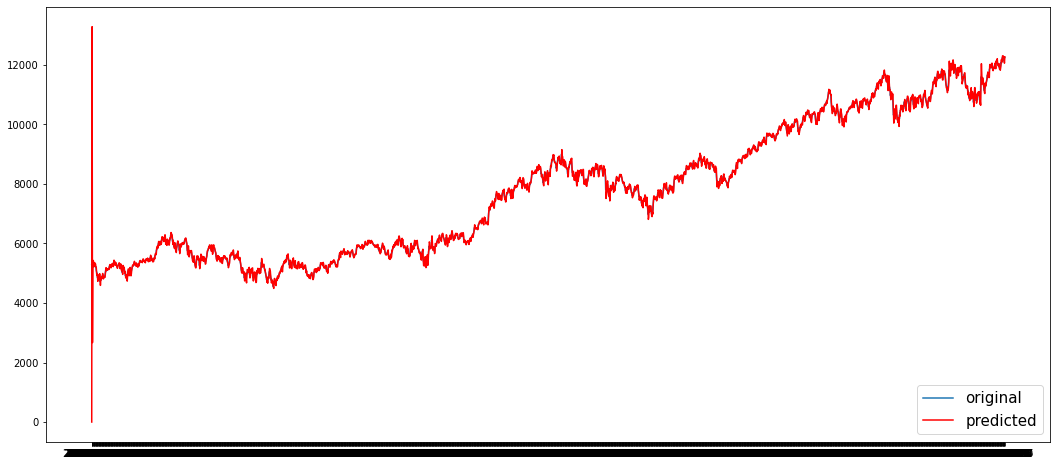

In [30]:
plt.plot(NSE['Adj Close'], label='original')
plt.plot(pred, color='red', label='predicted')
plt.legend(loc='best', prop={'size':15})
plt.show()

In [31]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2419
Model:                 ARIMA(2, 4, 3)   Log Likelihood              -14245.233
Date:                Thu, 28 Jan 2021   AIC                          28502.465
Time:                        02:00:46   BIC                          28537.202
Sample:                             0   HQIC                         28515.099
                               - 2419                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4638      0.034    -42.627      0.000      -1.531      -1.397
ar.L2         -0.4641      0.020    -23.124      0.000      -0.503      -0.425
ma.L1         -1.0002      0.035    -28.445      0.000      -1.069      -0.931
ma.L2         -0.9993      0.062    -16.097      0.000      -1.121      -0.878
ma.L3          0.9997      0.039     25.581      0.000       0.923       1.076
sigma2      7705.5433   5.31e-06   1.45e+09      0.000    7705.543    7705.543
===================================================================================
Ljung-Box (L1) (Q):                  46.22   Jarque-Bera (JB):               523.08
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.52e+24. Standard errors may be unstable.
"""

In [32]:
final1=ARIMA(detrend,order=(2,0,3))
final1=final1.fit()

C:\Users\sadhv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sadhv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sadhv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sadhv\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge.

In [33]:
final1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                C_price   No. Observations:                 2419
Model:                 ARIMA(2, 0, 3)   Log Likelihood                7237.883
Date:                Thu, 28 Jan 2021   AIC                         -14461.765
Time:                        02:00:59   BIC                         -14421.227
Sample:                             0   HQIC                        -14447.023
                               - 2419                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.237e-06   2.11e-05     -0.201      0.841   -4.56e-05    3.72e-05
ar.L1          0.9244      0.032     28.881      0.000       0.862       0.987
ar.L2         -0.2973      0.031     -9.645      0.000      -0.358      -0.237
ma.L1         -0.9898      0.031    -31.599      0.000      -1.051      -0.928
ma.L2          0.5482      0.033     16.481      0.000       0.483       0.613
ma.L3         -0.5258      0.016    -33.318      0.000      -0.557      -0.495
sigma2         0.0001   3.17e-06     44.005      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                  10.40   Jarque-Bera (JB):               205.78
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
forecast=final.forecast(steps=20)
forecast

C:\Users\sadhv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2419    12317.545008
2420    12354.827850
2421    12404.399967
2422    12447.839113
2423    12495.088026
2424    12540.148785
2425    12587.194818
2426    12632.907877
2427    12680.216103
2428    12726.380611
2429    12774.059338
2430    12820.640075
2431    12868.720718
2432    12915.718161
2433    12964.215561
2434    13011.637881
2435    13060.563307
2436    13108.420336
2437    13157.784285
2438    13206.086211
Name: predicted_mean, dtype: float64

In [35]:
def mean_abs_err(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
org=[12182.5,12282.2002,12226.65039,11993.04981,12052.9502,12025.34961,12215.90039,12256.79981,12329.54981,12362.29981,12343.29981,
12355.5,12352.34961,12224.54981,12169.84961,12106.90039,12180.34961,12248.25,12119,12055.79981]
forecast=[12317.545008,12354.827850,12404.399967,12447.839113,12495.088026,12540.148785,12587.194818,12632.907877,12680.216103,12726.380611,
12774.059338,12820.640075,12868.720718,12915.718161,12964.215561,13011.637881,13060.563307,13108.420336,13157.784285,13206.086211]
mean_abs_err(org,forecast)

4.512168266449803

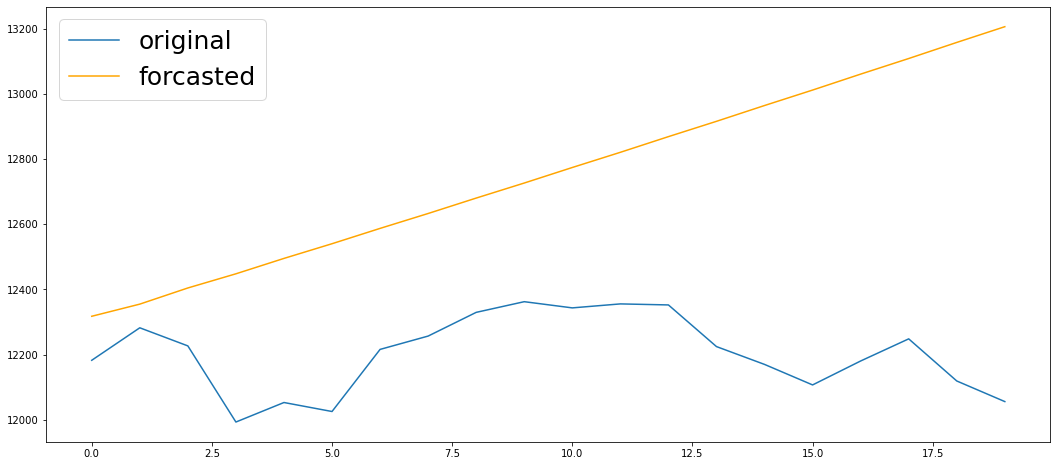

In [36]:
plt.plot(org, label='original')
plt.plot(forecast, color='orange', label='forcasted')
plt.legend(loc='best', prop={'size': 25})
plt.show()